# Test 1: Contour plot on random nonlinear data

/tmp/ipykernel_13857/2672810611.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


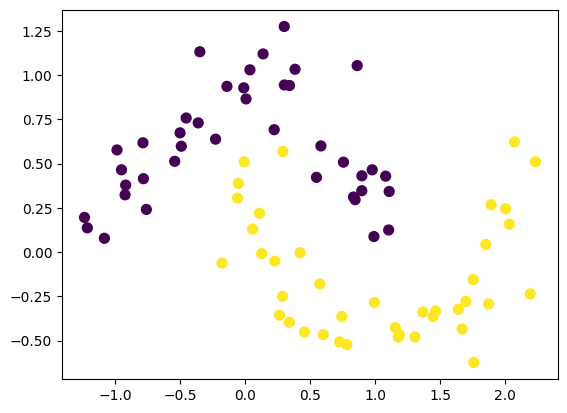

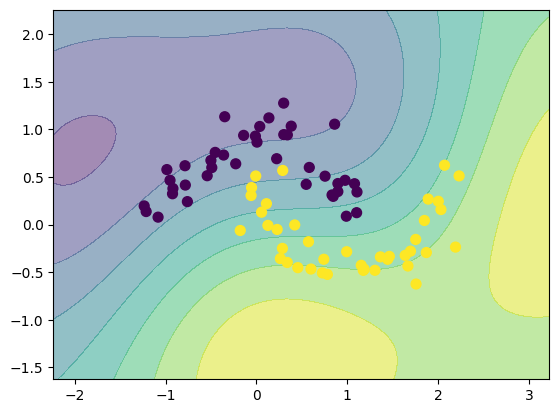

In [3]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd

X, y = make_moons(n_samples=80, noise=0.15, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()

model = SVR(kernel='rbf', C=1.0, gamma=0.2)
model.fit(X, y)

#creating a plotting mesh and predicting points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis') 
plt.show()





# Test 2: Fitted plot for random nonlinear (function) data

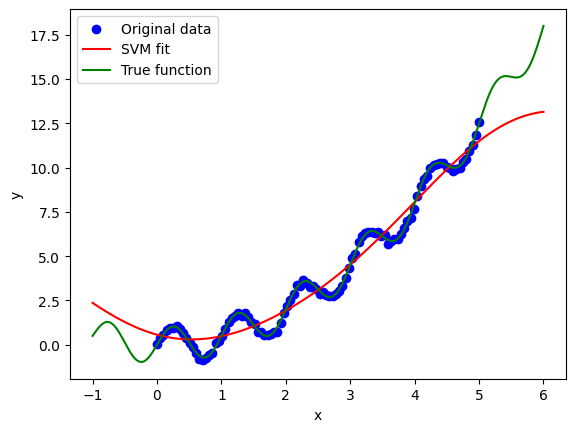

In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np

# Define the non-linear function
def f(x):
    return np.sin(2*np.pi*x) + 0.5*np.power(x, 2)

# Generate sample data
x = np.linspace(0, 5, 100)
y = f(x) + np.random.normal(0, 0.1, 100)  # Add some noise

# Create an SVM regressor with RBF kernel
model = SVR(kernel='rbf', C=100, gamma=0.1)

# Train the model on the data
model.fit(x.reshape(-1, 1), y)

# Create a prediction mesh
x_min, x_max = x.min() - 1, x.max() + 1
xx = np.linspace(x_min, x_max, 500)

# Make predictions on the mesh points
y_pred = model.predict(xx.reshape(-1, 1))

# Plot the original data and the SVM fit
plt.scatter(x, y, c='blue', label='Original data')
plt.plot(xx, y_pred, c='red', label='SVM fit')
plt.plot(xx, f(xx), c='green', label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Test 3: Running This Test with Known Sample Data (Chiran's Calibration Data)

NameError: name 'f' is not defined

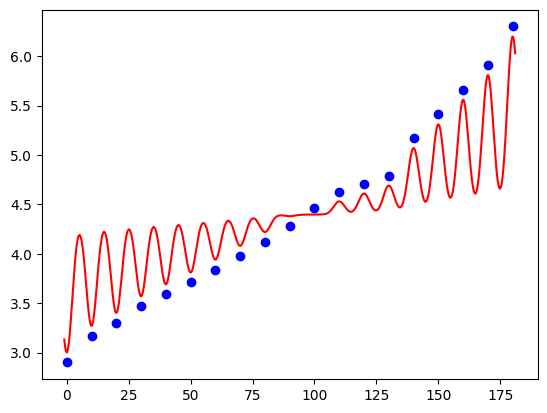

In [11]:
training_frame = pd.read_csv("trainingdata_old/training.csv")
training_frame.head()
x = training_frame['Angle'].to_numpy()
y = training_frame['at 489'].to_numpy()

# Create an SVM regressor with RBF kernel
model = SVR(kernel='rbf', C=100, gamma=0.1)

# Train the model on the data
model.fit(x.reshape(-1, 1), y)

# Create a prediction mesh
x_min, x_max = x.min() - 1, x.max() + 1
xx = np.linspace(x_min, x_max, 500)

# Make predictions on the mesh points
y_pred = model.predict(xx.reshape(-1, 1))

# Plot the original data and the SVM fit
plt.scatter(x, y, c='blue', label='Original data')
plt.plot(xx, y_pred, c='red', label='SVM fit')
plt.plot(xx, f(xx), c='green', label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()